In [1]:
%matplotlib inline 

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import csv
import sys
import time

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math

### DATA WRAPPING

In [2]:
csv_folder = "csv/numbered/"
csv_filenames = sorted(os.listdir(csv_folder))
print(csv_filenames)

csv_files = [csv_folder + csv_file for csv_file in csv_filenames]

['01.csv', '02.csv', '03.csv', '04.csv', '05.csv', '06.csv', '07.csv', '08.csv', '09.csv']


In [3]:
file_csv_all = "csv/all.csv"

with open("csv/all.csv","w") as csv_out:

    for idx_file, csv_file in enumerate(csv_files):

        with open(csv_file) as file:

            for idx_row, row in enumerate(file):
                if (idx_file != 0 and idx_row == 0): continue
                csv_out.write(row.lower())

In [4]:
all_rows = []

with open(file_csv_all) as f:  

    reader = csv.DictReader(f, delimiter=";")
    fields = reader.fieldnames
    
    for idx, row in enumerate(reader):
        all_rows.append(row)
            
print("{} rows, {} fields, {} cells".format(len(all_rows), len(fields), len(all_rows)*len(fields)))

310760 rows, 15 fields, 4661400 cells


In [5]:
print(fields)

['ticket nr', 'task nr', 'task code', 'category description', 'category code', 'item code', 'subitem code', 'initial narrative', 'response narrative', 'task created date', 'task closed date', 'task sla', 'assigned group', 'assigned user id', 'created user id']


In [6]:
def select_rows_by_category(category, rows):
    
    if category == "any": return rows
    
    s_rows = []
    
    for row in rows:
        if row["category code"] == category:
            s_rows.append(row)
            
    return s_rows

In [170]:
rows = select_rows_by_category("any", all_rows)
len(rows)

310760

In [171]:
def rows_with_fields(fields, rows, printing=True):
    
    output_rows = []
    
    for row in rows:
        for field in fields:
            if not row[field]:
                break
        else:
            output_rows.append(row)
            
    
    if (printing):
        print(len(output_rows), "rows with", (", ").join(fields))
        
    return output_rows

In [172]:
rows_C = rows_with_fields(["category code"], rows)
rows_Cg = rows_with_fields(["category code", "assigned group"], rows)

print("")

rows_CI = rows_with_fields(["category code", "item code"], rows)
rows_CIg = rows_with_fields(["category code", "item code", "assigned group"], rows)

print("")

rows_CIS = rows_with_fields(["category code", "item code", "subitem code"], rows)
rows_CISg = rows_with_fields(["category code", "item code", "subitem code", "assigned group"], rows)

304279 rows with category code
300907 rows with category code, assigned group

304244 rows with category code, item code
300906 rows with category code, item code, assigned group

70519 rows with category code, item code, subitem code
68660 rows with category code, item code, subitem code, assigned group


In [173]:
def combine_retails(rows):
    
    output_rows = []
    retail_fields = ["retail_branch", "retail_district"]
    
    for row in rows:
        for retail_field in retail_fields:
            if row["assigned group"].startswith(retail_field):
                row["assigned group"] = retail_field
        output_rows.append(row)
        
    return output_rows

### DATA SELECT

In [174]:
COMBINED_RETAILS = False

selected_rows = rows_CIg
rows_1 = combine_retails(selected_rows) if COMBINED_RETAILS else selected_rows

### DATA EXPLORATION

In [255]:
def create_set(fields, rows, printing=True, with_assigned_group=False):
    
    output_set = set()
    
    for row in rows:
        if (with_assigned_group and not row["assigned group"]): 
            continue
        items = ()
        for field in fields:
            items += (row[field],)
        
        output_set.add(items)
        
    if (printing):
        if (len(fields) == 1):
            print(len(output_set), "different", fields[0])
        else:
            print(len(output_set), "different combinations of", ", ".join(fields))
        
    return output_set

In [256]:
set_c = create_set(["category code"], rows_1)
set_i = create_set(["item code"], rows_1)
set_s = create_set(["subitem code"], rows_1)

print("")

set_ci = create_set(["category code", "item code"], rows_1)
set_cs = create_set(["category code", "subitem code"], rows_1)
set_is = create_set(["item code", "subitem code"], rows_1)

print("")

set_cis = create_set(["category code", "item code", "subitem code"], rows_1)

46 different category code
290 different item code
155 different subitem code

290 different combinations of category code, item code
199 different combinations of category code, subitem code
384 different combinations of item code, subitem code

384 different combinations of category code, item code, subitem code


In [257]:
set_g = create_set(["assigned group"], rows_1)

print("")

set_cg = create_set(["category code", "assigned group"], rows_1)
set_ig = create_set(["item code", "assigned group"], rows_1)
set_sg = create_set(["subitem code", "assigned group"], rows_1)

print("")

set_cig = create_set(["category code", "item code", "assigned group"], rows_1)
set_csg = create_set(["category code", "subitem code", "assigned group"], rows_1)
set_isg = create_set(["item code", "subitem code", "assigned group"], rows_1)

print("")

set_cisg = create_set(["category code", "item code", "subitem code", "assigned group"], rows_1)

451 different assigned group

791 different combinations of category code, assigned group
1101 different combinations of item code, assigned group
722 different combinations of subitem code, assigned group

1101 different combinations of category code, item code, assigned group
983 different combinations of category code, subitem code, assigned group
1203 different combinations of item code, subitem code, assigned group

1203 different combinations of category code, item code, subitem code, assigned group


In [258]:
print("{} groups:".format(len(set_g)))
sorted([g for g in set_g])

451 groups:


[('administrator',),
 ('bbos_west_region_flo',),
 ('brs_west_flo',),
 ('business_cards_maintenance_flo',),
 ('business_cards_origination_flo',),
 ('call_center_cae',),
 ('callcenter_probres_cae',),
 ('cardoperations_cae',),
 ('cce_credit_cards_flo',),
 ('cce_customer_service_flo',),
 ('cce_loans_flo',),
 ('cce_olb_mobile_flo',),
 ('ccfd_flo',),
 ('ccfd_managers_flo',),
 ('ccu_basic_cae',),
 ('cd_ira_managers_flo',),
 ('cdg_cae',),
 ('cesu_resl_cen',),
 ('clientexp_cae',),
 ('coll_re_rbb',),
 ('coll_rec_bk',),
 ('collections_cen',),
 ('columbia_call_center_flo',),
 ('compliance_cen',),
 ('consumer_cards_maintenance_flo',),
 ('consumer_cards_origination_flo',),
 ('consumer_loan_maintenance_flo',),
 ('consumer_loan_maintenance_managers_flo',),
 ('credit_cards_managers_flo',),
 ('credit_care_flo',),
 ('customer',),
 ('customer_service_pharr_flo',),
 ('customer_service_pr_flo',),
 ('data_entry_managers_flo',),
 ('data_entry_ops_flo',),
 ('dbo_flo',),
 ('dep_ops_cd_and_ira_flo',),
 ('dep_ops

### multiplicity:

In [259]:
cis_to_g = {}


for row in rows_1:
    
    cis_tuple = (row["category code"], row["item code"], row["subitem code"])
    
    if cis_tuple not in cis_to_g.keys():
        cis_to_g[cis_tuple] = [row["assigned group"]]
    else:
        if row["assigned group"] not in cis_to_g[cis_tuple]:
            cis_to_g[cis_tuple].append(row["assigned group"])

        
print(len(cis_to_g), "different combinations of (category code, item code, subitem code)")
print(sum(len(cis_to_g[cis]) for cis in cis_to_g), "different assignations of same (category code, item code, subitem code) to different group")

384 different combinations of (category code, item code, subitem code)
1203 different assignations of same (category code, item code, subitem code) to different group


In [260]:
cis_to_g[('34', '474', '')]

['fraud_investigate_cc_flo',
 'fraud_charge_off_cc_flo',
 'fraud_no_action_cc_flo',
 'fraud_operations_recovery_cc_flo',
 'cardoperations_cae',
 'dep_ops_cd_and_ira_flo',
 'retail_branch_21381_cae']

In [261]:
print("Number of different groups assigments from same (category/item/subitem):")

n_cistog = [(cis, len(cis_to_g[cis])) for cis in cis_to_g]
n_cistog = sorted(n_cistog, key=lambda x: -x[1])
n_cistog

Number of different groups assigments from same (category/item/subitem):


[(('47', '368', ''), 9),
 (('38', '472', ''), 9),
 (('41', '409', ''), 9),
 (('3', '64', ''), 9),
 (('50', '467', '113'), 9),
 (('29', '127', ''), 9),
 (('31', '419', ''), 9),
 (('50', '487', '459'), 9),
 (('50', '487', '454'), 9),
 (('50', '544', '452'), 9),
 (('44', '345', ''), 8),
 (('13', '188', ''), 8),
 (('41', '298', ''), 8),
 (('7', '2', ''), 8),
 (('50', '536', '101'), 8),
 (('44', '341', ''), 8),
 (('18', '218', ''), 8),
 (('39', '279', ''), 8),
 (('47', '369', ''), 8),
 (('44', '329', ''), 8),
 (('1', '72', ''), 8),
 (('13', '192', ''), 8),
 (('47', '381', ''), 8),
 (('50', '438', '107'), 8),
 (('20', '78', ''), 8),
 (('50', '544', '450'), 8),
 (('50', '511', '536'), 8),
 (('50', '496', '661'), 8),
 (('50', '490', '482'), 8),
 (('34', '474', ''), 7),
 (('50', '470', '425'), 7),
 (('34', '166', ''), 7),
 (('47', '365', ''), 7),
 (('52', '445', ''), 7),
 (('3', '56', ''), 7),
 (('47', '382', ''), 7),
 (('13', '213', ''), 7),
 (('41', '407', ''), 7),
 (('13', '181', ''), 7),
 (

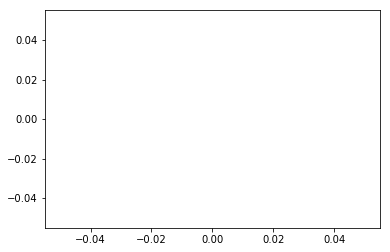

In [262]:
show_multiplicity_above = 10

n_cistog_plot = [cistog[1] for cistog in n_cistog if cistog[1] > show_multiplicity_above]
plt.plot(n_cistog_plot)
plt.show()

In [263]:
all_cis_to_g = {}


for row in rows_1:
    
    cis_tuple = (row["category code"], row["item code"], row["subitem code"])
    
    if cis_tuple not in all_cis_to_g.keys():
        all_cis_to_g[cis_tuple] = {row["assigned group"]: 1}
    else:
        if row["assigned group"] not in all_cis_to_g[cis_tuple].keys():
            all_cis_to_g[cis_tuple][row["assigned group"]] = 1
        else:
            all_cis_to_g[cis_tuple][row["assigned group"]] += 1
            
for cis in all_cis_to_g.keys():
    this_cis = all_cis_to_g[cis]
    pref_cig = [(g, this_cis[g]) for g in this_cis]
    pref_cig = sorted(pref_cig, key=lambda x: -x[1])
    all_cis_to_g[cis] = pref_cig

all_cis_to_g

{('1', '72', ''): [('ccu_basic_cae', 11),
  ('call_center_cae', 2),
  ('retail_branch_11350_cae', 2),
  ('retail_branch_22394_cae', 2),
  ('coll_rec_bk', 2),
  ('retail_branch_22382_cae', 1),
  ('retail_branch_33302_cae', 1),
  ('social_media_flo', 1)],
 ('1', '92', ''): [('ccu_basic_cae', 6),
  ('retail_branch_41302_cae', 1),
  ('retail_branch_11341_cae', 1),
  ('loans_pharr_flo', 1),
  ('compliance_cen', 1)],
 ('1', '97', ''): [('mortgage_pharr_flo', 1)],
 ('11', '98', ''): [('ccu_basic_cae', 14),
  ('retail_branch_11367_cae', 1),
  ('retail_branch_32321_cae', 1),
  ('retail_branch_02334_cae', 1),
  ('retail_branch_22332_cae', 1),
  ('retail_branch_23322_cae', 1),
  ('retail_branch_18353_cae', 1)],
 ('12', '100', ''): [('loanops_cen', 11), ('escrow_cen', 6)],
 ('12', '108', ''): [('ccu_basic_cae', 9),
  ('compliance_cen', 2),
  ('retail_branch_22329_cae', 1),
  ('retail_branch_41384_cae', 1)],
 ('12', '39', ''): [('loanops_cen', 3), ('escrow_cen', 3)],
 ('12', '52', ''): [('escrow_ce

In [264]:
all_cis_to_g[('1', '72', '')]

[('ccu_basic_cae', 11),
 ('call_center_cae', 2),
 ('retail_branch_11350_cae', 2),
 ('retail_branch_22394_cae', 2),
 ('coll_rec_bk', 2),
 ('retail_branch_22382_cae', 1),
 ('retail_branch_33302_cae', 1),
 ('social_media_flo', 1)]

In [265]:
pref_cis_to_g = {}

for cis in all_cis_to_g.keys():
    pref_cis_to_g[cis] = all_cis_to_g[cis][0][0]
    
pref_cis_to_g

{('1', '72', ''): 'ccu_basic_cae',
 ('1', '92', ''): 'ccu_basic_cae',
 ('1', '97', ''): 'mortgage_pharr_flo',
 ('11', '98', ''): 'ccu_basic_cae',
 ('12', '100', ''): 'loanops_cen',
 ('12', '108', ''): 'ccu_basic_cae',
 ('12', '39', ''): 'loanops_cen',
 ('12', '52', ''): 'escrow_cen',
 ('13', '176', ''): 'ccu_basic_cae',
 ('13', '180', ''): 'ccu_basic_cae',
 ('13', '181', ''): 'ccu_basic_cae',
 ('13', '182', ''): 'cce_credit_cards_flo',
 ('13', '183', ''): 'retail_branch_19312_cae',
 ('13', '185', ''): 'test_1_cae',
 ('13', '186', ''): 'ccu_basic_cae',
 ('13', '187', ''): 'ccu_basic_cae',
 ('13', '188', ''): 'ccu_basic_cae',
 ('13', '189', ''): 'ccu_basic_cae',
 ('13', '191', ''): 'ccu_basic_cae',
 ('13', '192', ''): 'ccu_basic_cae',
 ('13', '193', ''): 'ccu_basic_cae',
 ('13', '194', ''): 'ccu_basic_cae',
 ('13', '196', ''): 'ccu_basic_cae',
 ('13', '203', ''): 'ccu_basic_cae',
 ('13', '205', ''): 'ccu_basic_cae',
 ('13', '208', ''): 'ccu_basic_cae',
 ('13', '209', ''): 'ccu_basic_cae'

In [266]:
g_to_cis = {}


for row in rows_1:
    
    this_g = row["assigned group"]
    cis_tuple = (row["category code"], row["item code"], row["subitem code"])
    
    if this_g not in g_to_cis.keys():
        g_to_cis[this_g] = [cis_tuple]
    else:
        if cis_tuple not in g_to_cis[this_g]:
            g_to_cis[this_g].append(cis_tuple)
            
            
n_g_to_cis=[(g, len(g_to_cis[g])) for g in g_to_cis]
print("number of different (category/item/subitem) assignations for each group")
sorted(n_g_to_cis, key=lambda x: x[1])


number of different (category/item/subitem) assignations for each group


[('fraud_investigate_cc_flo', 1),
 ('fraud_charge_off_cc_flo', 1),
 ('fraud_no_action_cc_flo', 1),
 ('retail_branch_66356_cae', 1),
 ('retail_branch_01343_cae', 1),
 ('callcenter_probres_cae', 1),
 ('retail_branch_17363_cae', 1),
 ('retail_branch_21304_cae', 1),
 ('retail_branch_36302_cae', 1),
 ('dra_drm_cae', 1),
 ('retail_branch_11348_cae', 1),
 ('coll_re_rbb', 1),
 ('retail_branch_28300_cae', 1),
 ('retail_branch_22385_cae', 1),
 ('retail_branch_41361_cae', 1),
 ('retail_branch_07322_cae', 1),
 ('retail_branch_37301_cae', 1),
 ('retail_branch_29301_cae', 1),
 ('retail_branch_02312_cae', 1),
 ('retail_branch_46311_cae', 1),
 ('retail_branch_32332_cae', 1),
 ('retail_branch_41340_cae', 1),
 ('retail_branch_11305_cae', 1),
 ('retail_branch_17326_cae', 1),
 ('retail_branch_11308_cae', 1),
 ('retail_branch_22384_cae', 1),
 ('retail_branch_46315_cae', 1),
 ('retail_branch_32313_cae', 1),
 ('retail_branch_19313_cae', 1),
 ('retail_branch_21335_cae', 1),
 ('retail_branch_19325_cae', 1),
 (

In [267]:
g_to_cis['digital_rebound_flo']

[('58', '590', '699')]

In [268]:
g_to_cis_total = {}


for row in rows_1:
    
    this_g = row["assigned group"]
    cis_tuple = (row["category code"], row["item code"], row["subitem code"])
    
    if this_g not in g_to_cis_total.keys():
        g_to_cis_total[this_g] = [cis_tuple]
    else:
        g_to_cis_total[this_g].append(cis_tuple)
            
            
g_to_cis_total=[(g, len(g_to_cis_total[g])) for g in g_to_cis_total]
print("number of total (category/item/subitem) assignations for each group")
sorted(g_to_cis_total, key=lambda x: x[1])


number of total (category/item/subitem) assignations for each group


[('retail_branch_66356_cae', 1),
 ('retail_branch_01343_cae', 1),
 ('callcenter_probres_cae', 1),
 ('retail_branch_17363_cae', 1),
 ('retail_branch_21304_cae', 1),
 ('retail_branch_36302_cae', 1),
 ('retail_branch_11348_cae', 1),
 ('retail_branch_28300_cae', 1),
 ('retail_branch_22385_cae', 1),
 ('retail_branch_41361_cae', 1),
 ('retail_branch_07322_cae', 1),
 ('retail_branch_37301_cae', 1),
 ('retail_branch_02312_cae', 1),
 ('retail_branch_46311_cae', 1),
 ('retail_branch_32332_cae', 1),
 ('retail_branch_41340_cae', 1),
 ('retail_branch_11305_cae', 1),
 ('retail_branch_17326_cae', 1),
 ('retail_branch_11308_cae', 1),
 ('retail_branch_22384_cae', 1),
 ('retail_branch_46315_cae', 1),
 ('retail_branch_32313_cae', 1),
 ('retail_branch_19313_cae', 1),
 ('retail_branch_21335_cae', 1),
 ('retail_branch_19325_cae', 1),
 ('retail_branch_66320_cae', 1),
 ('retail_branch_22809_cae', 1),
 ('retail_branch_32356_cae', 1),
 ('retail_branch_11367_cae', 1),
 ('retail_branch_70325_cae', 1),
 ('retail_b

In [269]:
print("total assignations:",sum([a[1] for a in g_to_cis_total]))

total assignations: 8049


### reduce multiplicity

In [230]:
def reduce_multiplicity(max_multiplicity, rows):
    temp_rows = []
    
    for row in rows:
        
        tmp_tuple = (row["category code"], row["item code"], row["subitem code"])
        if len(cis_to_g[tmp_tuple]) < max_multiplicity:
            temp_rows.append(row)
    
    print("{} -> {}".format(len(rows), len(temp_rows)))
    return temp_rows

In [275]:
REDUCE_MULTIPLICITY = False
max_multiplicity = 2

if REDUCE_MULTIPLICITY: 
    rows_1 = reduce_multiplicity(max_multiplicity, rows_1)
else:
    print(len(rows_1))

680


### wrangling:

In [129]:
def create_mapping(field, rows, printing=False):
    
    tmp_mapping = []
    tmp_set = set()
    
    for row in rows:
        if row[field] not in tmp_set:
            tmp_set.add(row[field])
            tmp_mapping.append(row[field])
            
    if printing: print(len(tmp_mapping))
    return tmp_mapping

In [130]:
g_mapping = create_mapping("assigned group", rows_1)

c_mapping = create_mapping("category code", rows_1)
i_mapping = create_mapping("item code", rows_1)
s_mapping = create_mapping("subitem code", rows_1)

In [131]:
def vector_to_1h(value, size):
    onehot = np.zeros(size)
    onehot[value] = 1
    return onehot

In [132]:
class dataset_tick:
    
    def __init__(self, rows):
        
        self.features = []
        self.features_1h = []

        self.target_group = []
        self.target = []
        self.target_1h = []

        self.features_size = len(c_mapping) + len(i_mapping) + len(s_mapping)
        self.target_size = len(g_mapping)
        
        self.datasize = len(rows)
        self.pointer_idx = random.randint(0, self.datasize)
        
        for row in rows:

            this_feature = [row["category code"], row["item code"], row["subitem code"]]
            this_target = row["assigned group"]

            self.features.append(this_feature)
            self.target_group.append(this_target)
            self.target.append(g_mapping.index(this_target))

            self.features_1h.append(np.concatenate((vector_to_1h(c_mapping.index(row["category code"]), len(c_mapping)), vector_to_1h(i_mapping.index(row["item code"]), len(i_mapping)), vector_to_1h(s_mapping.index(row["subitem code"]), len(s_mapping)))))
            self.target_1h.append(vector_to_1h([g_mapping.index(this_target)], len(g_mapping)))        
        
        
    def next_batch(self, size, one_hot=False):
        
        da_targets = self.target_1h if one_hot else self.target
        
        idx_i = self.pointer_idx
        idx_f = idx_i + size
        
        if (idx_f < self.datasize):
            inputs = self.features_1h[idx_i:idx_f]
            targets = da_targets[idx_i:idx_f]
        else:
            idx_f = idx_f - self.datasize
            inputs = self.features_1h[idx_i:] + self.features_1h[:idx_f]
            targets = da_targets[idx_i:] + da_targets[:idx_f]
        
        self.pointer_idx = idx_f
        
        return (inputs, targets)

In [133]:
datasize = len(rows_1)

train_size = int(0.8 * datasize)
eval_size = int(0.1 * datasize)
test_size = int(0.1 * datasize)

ds_tick = dataset_tick(rows_1[:train_size])
ds_tick_eval = dataset_tick(rows_1[train_size:train_size+eval_size])
ds_tick_test = dataset_tick(rows_1[-test_size:])

In [134]:
print(ds_tick.datasize)
print(ds_tick_eval.datasize)
print(ds_tick_test.datasize)

184299
23037
23037


In [135]:
len(ds_tick_test.features)

23037

In [136]:
#test
#assert len(ds_tick.features_1h[0]) == sum([len(mapping) for mapping in (c_mapping, i_mapping, s_mapping)])    

## forward neural network:

In [142]:
INPUT_SIZE = ds_tick.features_size
NUM_CLASSES = ds_tick.target_size
print(INPUT_SIZE)
print(NUM_CLASSES)

class FLAGS:
    learning_rate = 0.001
    max_steps = 5000
    hidden1 = 800
    hidden2 = 800
    batch_size = 20
    log_dir = "model_tick"

659
789


In [143]:
def inference(inputs, hidden1_units, hidden2_units):

    with tf.name_scope('hidden1'):
        weights = tf.Variable(
                tf.truncated_normal([INPUT_SIZE, hidden1_units],
                stddev=1.0 / math.sqrt(float(INPUT_SIZE))),
                name='weights')
        biases = tf.Variable(tf.zeros([hidden1_units]), name='biases')
        hidden1 = tf.nn.relu(tf.matmul(inputs, weights) + biases)

    with tf.name_scope('hidden2'):
        weights = tf.Variable(
                tf.truncated_normal([hidden1_units, hidden2_units],
                stddev=1.0 / math.sqrt(float(hidden1_units))),
                name='weights')
        biases = tf.Variable(tf.zeros([hidden2_units]), name='biases')
        hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)

    with tf.name_scope('softmax_linear'):
        weights = tf.Variable(
                tf.truncated_normal([hidden2_units, NUM_CLASSES],
                stddev=1.0 / math.sqrt(float(hidden2_units))),
                name='weights')
        biases = tf.Variable(tf.zeros([NUM_CLASSES]), name='biases')
        logits = tf.matmul(hidden2, weights) + biases
        
    return logits


def nnloss(logits, labels):

    labels = tf.to_int64(labels)
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
            labels=labels, logits=logits, name='xentropy')
    return tf.reduce_mean(cross_entropy, name='xentropy_mean')


def training(loss, learning_rate):

    tf.summary.scalar('loss', loss)

    optimizer = tf.train.GradientDescentOptimizer(learning_rate)

    global_step = tf.Variable(0, name='global_step', trainable=False)

    train_op = optimizer.minimize(loss, global_step=global_step)
    return train_op


def evaluation(logits, labels):

    correct = tf.nn.in_top_k(logits, labels, 1)
    return tf.reduce_sum(tf.cast(correct, tf.int32))


def placeholder_inputs():

    inputs_placeholder = tf.placeholder(tf.float32, shape=(None, INPUT_SIZE))
    labels_placeholder = tf.placeholder(tf.int32, shape=(None))
    return inputs_placeholder, labels_placeholder


def fill_feed_dict(data_set, inputs_pl, labels_pl, batch_size):

    inputs_feed, labels_feed = data_set.next_batch(batch_size, False)
    
    feed_dict = {inputs_pl: inputs_feed, labels_pl: labels_feed}
    return feed_dict


def do_eval(sess, eval_correct, inputs_placeholder, labels_placeholder, data_set, batch_size):

    true_count = 0 
    steps_per_epoch = data_set.datasize // batch_size
    num_examples = steps_per_epoch * batch_size
    
    for step in range(steps_per_epoch):
        feed_dict = fill_feed_dict(data_set, inputs_placeholder, labels_placeholder, batch_size)
        true_count += sess.run(eval_correct, feed_dict=feed_dict)
        
    precision = float(true_count) / num_examples
    print('examples: %d, correct: %d, precision @ 1: %0.04f' % (data_set.datasize, true_count, precision))

In [144]:
g = tf.Graph()

with g.as_default():

    inputs_placeholder, labels_placeholder = placeholder_inputs()

    logits = inference(inputs_placeholder, FLAGS.hidden1, FLAGS.hidden2)
    prediction=tf.argmax(logits, 1)

    loss = nnloss(logits, labels_placeholder)
    train_op = training(loss, FLAGS.learning_rate)
    eval_correct = evaluation(logits, labels_placeholder)

    summary = tf.summary.merge_all()

    init = tf.global_variables_initializer()

    saver = tf.train.Saver()

In [145]:
with tf.Session(graph=g) as sess:

    summary_writer = tf.summary.FileWriter(FLAGS.log_dir, sess.graph)

    sess.run(init)

    #print(ds_tick.next_batch(10, False)[1])

    
    for step in range(FLAGS.max_steps):

        start_time = time.time()

        feed_dict = fill_feed_dict(ds_tick, inputs_placeholder, labels_placeholder, FLAGS.batch_size)
        _, loss_value, preds = sess.run([train_op, loss, prediction], feed_dict=feed_dict)

        duration = time.time() - start_time

        
        if step % 100 == 0:

            print('Step %d: loss = %.2f (%.3f sec)' % (step, loss_value, duration))
            #print(preds)

            summary_str = sess.run(summary, feed_dict=feed_dict)
            summary_writer.add_summary(summary_str, step)
            summary_writer.flush()


        if (step + 1) % 1000 == 0 or (step + 1) == FLAGS.max_steps:
            checkpoint_file = "model_full/full.ckpt"
            saver.save(sess, checkpoint_file, global_step=step)

            print('Training Data Eval:')
            do_eval(sess, eval_correct, inputs_placeholder, labels_placeholder, ds_tick, FLAGS.batch_size)

            print('Validation Data Eval:')
            do_eval(sess, eval_correct, inputs_placeholder, labels_placeholder, ds_tick_eval, FLAGS.batch_size)

            print('Test Data Eval:')
            do_eval(sess, eval_correct, inputs_placeholder, labels_placeholder, ds_tick_test, FLAGS.batch_size)


    saver.save(sess, checkpoint_file)
    print("model saved in", checkpoint_file)

[11, 37, 38, 25, 27, 37, 38, 37, 38, 28]
Step 0: loss = 6.68 (0.018 sec)
Step 100: loss = 6.63 (0.015 sec)
Step 200: loss = 6.61 (0.015 sec)
Step 300: loss = 6.63 (0.015 sec)
Step 400: loss = 6.54 (0.015 sec)
Step 500: loss = 6.44 (0.015 sec)
Step 600: loss = 6.40 (0.015 sec)
Step 700: loss = 6.43 (0.015 sec)
Step 800: loss = 6.19 (0.015 sec)
Step 900: loss = 6.29 (0.015 sec)
Training Data Eval:
examples: 184299, correct: 53439, precision @ 1: 0.2900
Validation Data Eval:
examples: 23037, correct: 6577, precision @ 1: 0.2857
Test Data Eval:
examples: 23037, correct: 7004, precision @ 1: 0.3043
Step 1000: loss = 6.55 (0.015 sec)
Step 1100: loss = 5.83 (0.015 sec)
Step 1200: loss = 5.17 (0.018 sec)
Step 1300: loss = 5.01 (0.016 sec)
Step 1400: loss = 6.08 (0.016 sec)
Step 1500: loss = 3.68 (0.016 sec)
Step 1600: loss = 3.84 (0.015 sec)
Step 1700: loss = 4.19 (0.016 sec)
Step 1800: loss = 2.19 (0.016 sec)
Step 1900: loss = 5.44 (0.015 sec)
Training Data Eval:
examples: 184299, correct: 53

In [152]:
test_inputs, test_labels = ds_tick.next_batch(20)
            

with tf.Session(graph=g) as sess:
    
    checkpoint_file = "model_full/full.ckpt"
    saver.restore(sess, checkpoint_file)

    print("labels", test_labels)
    print("predictions", prediction.eval(feed_dict={inputs_placeholder: test_inputs, labels_placeholder: test_labels}, session=sess))

INFO:tensorflow:Restoring parameters from model_full/full.ckpt
labels [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 79, 25, 25, 305, 25, 25, 25, 25, 25]
predictions [28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28]


### deterministic

In [250]:
one_cis_to_g

{('1', '72', ''): 'ccu_basic_cae',
 ('1', '92', ''): 'ccu_basic_cae',
 ('1', '97', ''): 'mortgage_pharr_flo',
 ('11', '107', ''): 'ccu_basic_cae',
 ('11', '93', ''): 'ccu_basic_cae',
 ('11', '98', ''): 'ccu_basic_cae',
 ('12', '100', ''): 'loanops_cen',
 ('12', '108', ''): 'ccu_basic_cae',
 ('12', '39', ''): 'loanops_cen',
 ('12', '52', ''): 'escrow_cen',
 ('13', '176', ''): 'ccu_basic_cae',
 ('13', '178', ''): 'ccu_basic_cae',
 ('13', '179', ''): 'ccu_basic_cae',
 ('13', '180', ''): 'ccu_basic_cae',
 ('13', '181', ''): 'ccu_basic_cae',
 ('13', '182', ''): 'cce_credit_cards_flo',
 ('13', '183', ''): 'retail_branch_19312_cae',
 ('13', '184', ''): 'ccu_basic_cae',
 ('13', '185', ''): 'test_1_cae',
 ('13', '186', ''): 'ccu_basic_cae',
 ('13', '187', ''): 'ccu_basic_cae',
 ('13', '188', ''): 'ccu_basic_cae',
 ('13', '189', ''): 'ccu_basic_cae',
 ('13', '190', ''): 'ccu_basic_cae',
 ('13', '191', ''): 'ccu_basic_cae',
 ('13', '192', ''): 'ccu_basic_cae',
 ('13', '193', ''): 'ccu_basic_cae',

In [270]:
pred_count = 0

for row in rows_1:
    cis = (row["category code"], row["item code"], row["subitem code"])
    pred_count += int( pref_cis_to_g[cis] == row["assigned group"])
    
print("total {}, correct {}, accuracy {}".format(len(rows_1), pred_count, pred_count/len(rows_1)))

total 8049, correct 5865, accuracy 0.7286619455833023


#### altNN 

In [295]:
INPUT_SIZE = ds_tick.features_size
NUM_CLASSES = ds_tick.target_size
print(INPUT_SIZE)
print(NUM_CLASSES)


class FLAGS:
    learning_rate = 0.003
    max_steps = 5000
    hidden1 = 1000
    hidden2 = 500
    batch_size = 200
    log_dir = "model_tick"

659
789


In [278]:
def inference(inputs, hidden1_units, hidden2_units):

    with tf.name_scope('hidden1'):
        weights = tf.Variable(
                tf.truncated_normal([INPUT_SIZE, hidden1_units],
                stddev=1.0 / math.sqrt(float(INPUT_SIZE))),
                name='weights')
        biases = tf.Variable(tf.zeros([hidden1_units]), name='biases')
        hidden1 = tf.nn.relu(tf.matmul(inputs, weights) + biases)

    with tf.name_scope('hidden2'):
        weights = tf.Variable(
                tf.truncated_normal([hidden1_units, hidden2_units],
                stddev=1.0 / math.sqrt(float(hidden1_units))),
                name='weights')
        biases = tf.Variable(tf.zeros([hidden2_units]), name='biases')
        hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)

    with tf.name_scope('softmax_linear'):
        weights = tf.Variable(
                tf.truncated_normal([hidden2_units, NUM_CLASSES],
                stddev=1.0 / math.sqrt(float(hidden2_units))),
                name='weights')
        biases = tf.Variable(tf.zeros([NUM_CLASSES]), name='biases')
        logits = tf.matmul(hidden2, weights) + biases
        
    return logits


def nnloss(logits, labels):

    labels = tf.to_int64(labels)
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
            labels=labels, logits=logits, name='xentropy')
    return tf.reduce_mean(cross_entropy, name='xentropy_mean')


def training(loss, learning_rate):

    tf.summary.scalar('loss', loss)

    optimizer = tf.train.GradientDescentOptimizer(learning_rate)

    global_step = tf.Variable(0, name='global_step', trainable=False)

    train_op = optimizer.minimize(loss, global_step=global_step)
    return train_op


def evaluation(logits, labels):

    correct = tf.nn.in_top_k(logits, labels, 1)
    return tf.reduce_sum(tf.cast(correct, tf.int32))


def placeholder_inputs():

    inputs_placeholder = tf.placeholder(tf.float32, shape=(None, INPUT_SIZE))
    labels_placeholder = tf.placeholder(tf.int32, shape=(None))
    return inputs_placeholder, labels_placeholder


def fill_feed_dict(data_set, inputs_pl, labels_pl, batch_size):

    inputs_feed, labels_feed = data_set.next_batch(batch_size, False)
    
    feed_dict = {inputs_pl: inputs_feed, labels_pl: labels_feed}
    return feed_dict


def do_eval(sess, eval_correct, inputs_placeholder, labels_placeholder, data_set, batch_size):

    true_count = 0 
    steps_per_epoch = data_set.datasize // batch_size
    num_examples = steps_per_epoch * batch_size
    
    for step in range(steps_per_epoch):
        feed_dict = fill_feed_dict(data_set, inputs_placeholder, labels_placeholder, batch_size)
        true_count += sess.run(eval_correct, feed_dict=feed_dict)
        
    precision = float(true_count) / num_examples
    print('examples: %d, correct: %d, precision @ 1: %0.04f' % (data_set.datasize, true_count, precision))

In [288]:
g = tf.Graph()


with g.as_default():

    
    inputs_placeholder = tf.placeholder(tf.float32, shape=(None, INPUT_SIZE))
    labels_placeholder = tf.placeholder(tf.int32, shape=(None))

    
    with tf.name_scope('hidden1'):
        weights = tf.Variable(
                tf.truncated_normal([INPUT_SIZE, FLAGS.hidden1],
                stddev=1.0 / math.sqrt(float(INPUT_SIZE))),
                name='weights')
        biases = tf.Variable(tf.zeros([FLAGS.hidden1]), name='biases')
        hidden1 = tf.nn.relu(tf.matmul(inputs_placeholder, weights) + biases)

    with tf.name_scope('hidden2'):
        weights = tf.Variable(
                tf.truncated_normal([FLAGS.hidden1, FLAGS.hidden2],
                stddev=1.0 / math.sqrt(float(FLAGS.hidden1))),
                name='weights')
        biases = tf.Variable(tf.zeros([FLAGS.hidden2]), name='biases')
        hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)

    with tf.name_scope('softmax_linear'):
        weights = tf.Variable(
                tf.truncated_normal([FLAGS.hidden2, NUM_CLASSES],
                stddev=1.0 / math.sqrt(float(FLAGS.hidden2))),
                name='weights')
        biases = tf.Variable(tf.zeros([NUM_CLASSES]), name='biases')
        logits = tf.matmul(hidden2, weights) + biases
        
        
    prediction=tf.argmax(logits, 1)

    
    labels = tf.to_int64(labels_placeholder)
    cross_entropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
            labels=labels_placeholder, logits=logits, name='xentropy')
    loss = tf.reduce_mean(cross_entropy, name='xentropy_mean')

    
    tf.summary.scalar('loss', loss)

    optimizer = tf.train.GradientDescentOptimizer(FLAGS.learning_rate)

    global_step = tf.Variable(0, name='global_step', trainable=False)

    train_op = optimizer.minimize(loss, global_step=global_step)
    
    
    correct = tf.nn.in_top_k(logits, labels_placeholder, 1)
    eval_correct = tf.reduce_sum(tf.cast(correct, tf.int32))


    summary = tf.summary.merge_all()

    init = tf.global_variables_initializer()

    saver = tf.train.Saver()

In [294]:
checkpoint_file = "model_full/full.ckpt"


with tf.Session(graph=g) as sess:

    summary_writer = tf.summary.FileWriter(FLAGS.log_dir, sess.graph)

    sess.run(init)

    #print(ds_tick.next_batch(10, False)[1])

    
    for step in range(FLAGS.max_steps):

        start_time = time.time()

        inputs_feed, labels_feed = ds_tick.next_batch(FLAGS.batch_size, False)
    
        feed_dict = {inputs_placeholder: inputs_feed, labels_placeholder: labels_feed}

        _, loss_value, preds = sess.run([train_op, loss, prediction], feed_dict=feed_dict)

        duration = time.time() - start_time
        #print(step)
        
        if step % 100 == 0:

            print('Step %d: loss = %.2f (%.3f sec)' % (step, loss_value, duration))
            #print(preds)

            summary_str = sess.run(summary, feed_dict=feed_dict)
            summary_writer.add_summary(summary_str, step)
            summary_writer.flush()


        if (step + 1) % 1000 == 0 or (step + 1) == FLAGS.max_steps:
            saver.save(sess, checkpoint_file, global_step=step)

            #print('Training Data Eval:')
            #do_eval(sess, eval_correct, inputs_placeholder, labels_placeholder, ds_tick, FLAGS.batch_size)

            print('Validation Data Eval:')
            do_eval(sess, eval_correct, inputs_placeholder, labels_placeholder, ds_tick_eval, FLAGS.batch_size)

            #print('Test Data Eval:')
            #do_eval(sess, eval_correct, inputs_placeholder, labels_placeholder, ds_tick_test, FLAGS.batch_size)

    saver.save(sess, checkpoint_file)
    print("model saved in", checkpoint_file)
            
    print('Training Data Eval:')
    do_eval(sess, eval_correct, inputs_placeholder, labels_placeholder, ds_tick, FLAGS.batch_size)

    print('Validation Data Eval:')
    do_eval(sess, eval_correct, inputs_placeholder, labels_placeholder, ds_tick_eval, FLAGS.batch_size)

    print('Test Data Eval:')
    do_eval(sess, eval_correct, inputs_placeholder, labels_placeholder, ds_tick_test, FLAGS.batch_size)

Step 0: loss = 6.67 (0.102 sec)
Step 100: loss = 6.63 (0.097 sec)
Step 200: loss = 6.64 (0.097 sec)
Step 300: loss = 6.61 (0.098 sec)
Step 400: loss = 6.48 (0.097 sec)
Step 500: loss = 6.33 (0.160 sec)
Step 600: loss = 6.36 (0.160 sec)
Step 700: loss = 6.24 (0.134 sec)
Step 800: loss = 6.23 (0.097 sec)
Step 900: loss = 6.20 (0.097 sec)
Validation Data Eval:
examples: 23037, correct: 6561, precision @ 1: 0.2853
Step 1000: loss = 6.07 (0.097 sec)
Step 1100: loss = 5.91 (0.097 sec)
Step 1200: loss = 5.71 (0.097 sec)
Step 1300: loss = 5.15 (0.097 sec)
Step 1400: loss = 4.59 (0.098 sec)
Step 1500: loss = 4.40 (0.098 sec)
Step 1600: loss = 3.55 (0.097 sec)
Step 1700: loss = 3.82 (0.097 sec)
Step 1800: loss = 4.73 (0.098 sec)
Step 1900: loss = 3.68 (0.101 sec)
Validation Data Eval:
examples: 23037, correct: 6560, precision @ 1: 0.2852
Step 2000: loss = 3.79 (0.097 sec)
Step 2100: loss = 3.81 (0.097 sec)
Step 2200: loss = 2.18 (0.097 sec)
Step 2300: loss = 2.39 (0.097 sec)
Step 2400: loss = 3.

In [152]:
test_inputs, test_labels = ds_tick.next_batch(20)
            

with tf.Session(graph=g) as sess:
    
    checkpoint_file = "model_full/full.ckpt"
    saver.restore(sess, checkpoint_file)

    print("labels", test_labels)
    print("predictions", prediction.eval(feed_dict={inputs_placeholder: test_inputs, labels_placeholder: test_labels}, session=sess))

INFO:tensorflow:Restoring parameters from model_full/full.ckpt
labels [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 79, 25, 25, 305, 25, 25, 25, 25, 25]
predictions [28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28 28]
